The incidence rate is a measure of how fast new cases of a disease occur in a population over time. 
It is often expressed per unit of population and per unit of time.

In [1]:
import os
import json
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import Markdown as md
 
def get_created_at(json_path):
    if os.path.exists(json_path):
        with open(json_path, "r") as file:
            data = json.load(file)
        return data['created_at'] #data.get("created_at", None)
    else:
        return None
 

In [2]:
"""
Python 3 function to convert rumour annotations into True, False, Unverified
"""

def convert_annotations(annotation, string = True):
    if 'misinformation' in annotation.keys() and 'true'in annotation.keys():
        if int(annotation['misinformation'])==0 and int(annotation['true'])==0:
            if string:
                label = "unverified"
            else:
                label = 2
        elif int(annotation['misinformation'])==0 and int(annotation['true'])==1 :
            if string:
                label = "true"
            else:
                label = 1
        elif int(annotation['misinformation'])==1 and int(annotation['true'])==0 :
            if string:
                label = "false"
            else:
                label = 0
        elif int(annotation['misinformation'])==1 and int(annotation['true'])==1:
            print ("OMG! They both are 1!")
            print(annotation['misinformation'])
            print(annotation['true'])
            label = None
            
    elif 'misinformation' in annotation.keys() and 'true' not in annotation.keys():
        # all instances have misinfo label but don't have true label
        if int(annotation['misinformation'])==0:
            if string:
                label = "unverified"
            else:
                label = 2
        elif int(annotation['misinformation'])==1:
            if string:
                label = "false"
            else:
                label = 0
                
    elif 'true' in annotation.keys() and 'misinformation' not in annotation.keys():
        #print ('Has true not misinformation')
        label = None
    else:
        #print('No annotations')
        label = None
           
    return label


In [3]:
import os
# Create a DataFrame from the lists
df = pd.DataFrame(columns=['TweetID', 'IsRumour', 'IsTrue','Path','CreatedAt','RootFollowerCount'])
df
count=0
Incidentdirectory = './Data/PHEME_veracity/all-rnr-annotated-threads/'
for subdirectoryIncident in os.listdir(Incidentdirectory):
    subdirectoryIncident_path = os.path.join(Incidentdirectory, subdirectoryIncident)
    if os.path.isdir(subdirectoryIncident_path):
        rmourOrnonrumour=['rumours','non-rumours']
        for rumourLabel in rmourOrnonrumour:
            directory =subdirectoryIncident_path+'/'+rumourLabel
            #directory = './Data/PHEME_veracity/all-rnr-annotated-threads/ottawashooting-all-rnr-threads/'+rumourLabel
            for subdirectory in os.listdir(directory):
                    subdirectory_path = os.path.join(directory, subdirectory)
                    if os.path.isdir(subdirectory_path):
                        count=count+1
                        #print("Subdirectory: ",count, subdirectory_path )
                        # Open and read the JSON file
                        file_path=subdirectory_path+'/annotation.json'
                        with open(file_path, 'r') as file:
                            data = json.load(file)
                            my_dict = {}
                            for key, value in data.items():
                                my_dict[key] = value
                            

                            # Create a dictionary with the data for the new row
                            new_row_data = {
                                'TweetID': subdirectory,
                                'IsRumour':  my_dict['is_rumour'],
                                'IsTrue':convert_annotations(my_dict) ,#'true' if my_dict['is_rumour']=='nonrumour' else convert_annotations(my_dict) ,
                                'Path':subdirectory_path
                            }
                            # Convert the dictionary to a DataFrame
                            new_row_df = pd.DataFrame(new_row_data, index=[0])
                            # Concatenate the new row DataFrame with the original DataFrame
                            df = pd.concat([df, new_row_df], ignore_index=True)
df

,TweetID,IsRumour,IsTrue,Path,CreatedAt,RootFollowerCount
0,552783238415265792,rumour,true,./Data/PHEME_veracity/all-rnr-annotated-thread...,NaN,NaN
1,552783667052167168,rumour,true,./Data/PHEME_veracity/all-rnr-annotated-thread...,NaN,NaN
2,552783745565347840,rumour,true,./Data/PHEME_veracity/all-rnr-annotated-thread...,NaN,NaN
3,552784168849907712,rumour,true,./Data/PHEME_veracity/all-rnr-annotated-thread...,NaN,NaN
4,552784526955806720,rumour,true,./Data/PHEME_veracity/all-rnr-annotated-thread...,NaN,NaN
...,...,...,...,...,...,...
6420,544521260840267776,nonrumour,None,./Data/PHEME_veracity/all-rnr-annotated-thread...,NaN,NaN
6421,544521433473634304,nonrumour,None,./Data/PHEME_veracity/all-rnr-annotated-thread...,NaN,NaN
6422,544521788777304064,nonrumour,None,./Data/PHEME_veracity/all-rnr-annotated-thread...,NaN,NaN
6423,544521880661950464,nonrumour,None,./Data/PHEME_veracity/all-rnr-annotated-thread...,NaN,NaN


In [4]:
# Get the value counts of 'IsTrue'
value_counts = df['IsTrue'].value_counts()

print("Value Counts of 'IsTrue':")
print(value_counts)

Value Counts of 'IsTrue':
true          1067
unverified     697
false          638
Name: IsTrue, dtype: int64


In [5]:
#Take Only False Tweets
df[df['IsTrue'].isin(['true','false'])]['IsTrue'].unique()
df[df['IsTrue'].isin(['true','false'])]['IsTrue'].value_counts()
df=df[df['IsTrue'].isin(['false'])]
#df['IsTrue'] = df['IsTrue'].str.lower().replace({'true': True, 'false': False})
# Convert 'IsTrue' column to boolean
#df['IsTrue'] = df['IsTrue'].map({'true': True, 'false': False})
df = df.reset_index(drop=True)
df

,TweetID,IsRumour,IsTrue,Path,CreatedAt,RootFollowerCount
0,552801880812691456,rumour,false,./Data/PHEME_veracity/all-rnr-annotated-thread...,NaN,NaN
1,552805267990413312,rumour,false,./Data/PHEME_veracity/all-rnr-annotated-thread...,NaN,NaN
2,552806309540528128,rumour,false,./Data/PHEME_veracity/all-rnr-annotated-thread...,NaN,NaN
3,552807027781947393,rumour,false,./Data/PHEME_veracity/all-rnr-annotated-thread...,NaN,NaN
4,552807210041212928,rumour,false,./Data/PHEME_veracity/all-rnr-annotated-thread...,NaN,NaN
...,...,...,...,...,...,...
633,544407300329709568,rumour,false,./Data/PHEME_veracity/all-rnr-annotated-thread...,NaN,NaN
634,544443739800731648,rumour,false,./Data/PHEME_veracity/all-rnr-annotated-thread...,NaN,NaN
635,544446282559799296,rumour,false,./Data/PHEME_veracity/all-rnr-annotated-thread...,NaN,NaN
636,544451181754744832,rumour,false,./Data/PHEME_veracity/all-rnr-annotated-thread...,NaN,NaN


In [6]:
df.iloc[0]['Path']

'./Data/PHEME_veracity/all-rnr-annotated-threads/charliehebdo-all-rnr-threads/rumours\\552801880812691456'

In [7]:
# #Adding Root Followers Count

# for index, row in df.iterrows():
#     file_path_sourceTweet=df.iloc[index]['Path']+'/source-tweets/'+df.iloc[index]['TweetID']+'.json'
    

In [8]:
from datetime import datetime

# # Iterate through the DataFrame and add Created At
for index, row in df.iterrows(): # df[:1000].iterrows(): 
#for index, row in  df[:10].iterrows(): 
    #fileName=df.iloc[index]['Path']+'/structure.json'
    file_path_sourceTweet=df.iloc[index]['Path']+'/source-tweets/'+df.iloc[index]['TweetID']+'.json'
    with open(file_path_sourceTweet, 'r') as fileSource:
        data_Source = json.load(fileSource)
    # Extract the value of the 'created_at' field
    created_at_str  = data_Source['created_at']
    # Convert the string to a datetime object
    created_at_datetime = datetime.strptime(created_at_str, '%a %b %d %H:%M:%S +0000 %Y')
    df.iloc[index]['CreatedAt']=created_at_datetime
    
    #source_follower_count=data_Source['followers_count']
    df.iloc[index]['RootFollowerCount']=data_Source['user']['followers_count']
df

,TweetID,IsRumour,IsTrue,Path,CreatedAt,RootFollowerCount
0,552801880812691456,rumour,false,./Data/PHEME_veracity/all-rnr-annotated-thread...,2015-01-07 12:20:13,15764
1,552805267990413312,rumour,false,./Data/PHEME_veracity/all-rnr-annotated-thread...,2015-01-07 12:33:41,441
2,552806309540528128,rumour,false,./Data/PHEME_veracity/all-rnr-annotated-thread...,2015-01-07 12:37:49,61134
3,552807027781947393,rumour,false,./Data/PHEME_veracity/all-rnr-annotated-thread...,2015-01-07 12:40:40,13601
4,552807210041212928,rumour,false,./Data/PHEME_veracity/all-rnr-annotated-thread...,2015-01-07 12:41:24,5762
...,...,...,...,...,...,...
633,544407300329709568,rumour,false,./Data/PHEME_veracity/all-rnr-annotated-thread...,2014-12-15 08:23:09,2434154
634,544443739800731648,rumour,false,./Data/PHEME_veracity/all-rnr-annotated-thread...,2014-12-15 10:47:57,965
635,544446282559799296,rumour,false,./Data/PHEME_veracity/all-rnr-annotated-thread...,2014-12-15 10:58:03,2493
636,544451181754744832,rumour,false,./Data/PHEME_veracity/all-rnr-annotated-thread...,2014-12-15 11:17:31,1732220


In [9]:
# Create a DataFrame from the lists
dfAllTweets = pd.DataFrame(columns=['RootTweetID', 'IsRumour', 'IsTrue','Path','RootCreatedAt','RootFollowerCount',
                                    'FromTweetID','ToTweetID','TweetFollowerCount','ReTweetCount','FromCreatedTime','ToCreatedTime'])
dfAllTweets
import pandas as pd
encoding = 'utf-8'
# # Iterate through the DataFrame and add Created At
#for index, row in df.iterrows(): # df[:1000].iterrows():
fileName=df.iloc[0]['Path']+'/structure.json'
with open(fileName, 'r', encoding=encoding) as file:
    json_data = json.load(file)
# # Your JSON data
# json_data = {
#     "552783667052167168": {
#         "552785374507175936": {
#             "552786226546495488": {
#                 "552789345628069888": []
#             }
#         },
#         "552789153403109376": [],
#         "552790281276628992": [],
#         "552792862610694144": [],
#         "552943855021330432": []
#     }
# }

# Function to flatten the JSON tree structure and create a DataFrame
def flatten_json_tree(json_data, parent=None):
    data = []
    for key, value in json_data.items():
        #print(json_data)
        root_key = next(iter(json_data))  # Get the root key
        num_children = len(json_data[root_key])  # Count direct children
        #print(num_children)
        data.append({"From": parent, "To": key,'ReTweetCount':num_children})
        if isinstance(value, dict):
            data.extend(flatten_json_tree(value, parent=key))
        #print(data)
    return data

# print('#REMOVE restriction')
for index, row in df.iterrows(): # df[:1000].iterrows():
#for index, row in  df[:1].iterrows(): #REMOVE
    fileName=df.iloc[index]['Path']+'/structure.json'
    with open(fileName, 'r', encoding=encoding) as file:
        json_data = json.load(file)
    # Create DataFrame
    dfStructure = pd.DataFrame(flatten_json_tree(json_data))
    dfStructure.dropna(inplace=True)
    for indexTweet, rowTweet in dfStructure.iterrows():
        # New data for the row
        TweetfileName=df.iloc[index]['Path']+'/reactions/'+rowTweet['From']+'.json'
       
        if row['TweetID']!= rowTweet['From']:
            with open(TweetfileName, 'r', encoding=encoding) as file:
                json_data_tweet = json.load(file)
        TweetfileName=df.iloc[index]['Path']+'/reactions/'+rowTweet['To']+'.json'
        #print(TweetfileName)
        with open(TweetfileName, 'r', encoding=encoding) as file:
                json_data_tweet_to = json.load(file)
        
        


        FromCreatedTime=row['CreatedAt'] if row['TweetID']== rowTweet['From'] else  datetime.strptime( json_data_tweet['created_at'], '%a %b %d %H:%M:%S +0000 %Y')
        new_data = {'RootTweetID': row['TweetID'],'IsRumour':row['IsRumour'],'IsTrue':row['IsTrue'],
                   'Path':row['Path'],'RootCreatedAt':row['CreatedAt'],'RootFollowerCount':row['RootFollowerCount'], 'FromTweetID': rowTweet['From'],
                   'ToTweetID':rowTweet['To'],'TweetFollowerCount':json_data_tweet_to['user']['followers_count'], 
                    'ReTweetCount':rowTweet['ReTweetCount'],
                    'FromCreatedTime':FromCreatedTime,'ToCreatedTime':  datetime.strptime( json_data_tweet_to['created_at'], '%a %b %d %H:%M:%S +0000 %Y')}

        dfAllTweets = pd.concat([dfAllTweets, pd.DataFrame([new_data])], ignore_index=True)



#Display DataFrame
dfAllTweets


,RootTweetID,IsRumour,IsTrue,Path,RootCreatedAt,RootFollowerCount,FromTweetID,ToTweetID,TweetFollowerCount,ReTweetCount,FromCreatedTime,ToCreatedTime
0,552801880812691456,rumour,false,./Data/PHEME_veracity/all-rnr-annotated-thread...,2015-01-07 12:20:13,15764,552801880812691456,552803577073111040,1818,1,2015-01-07 12:20:13,2015-01-07 12:26:58
1,552801880812691456,rumour,false,./Data/PHEME_veracity/all-rnr-annotated-thread...,2015-01-07 12:20:13,15764,552803577073111040,552804231183208449,15802,1,2015-01-07 12:26:58,2015-01-07 12:29:33
2,552801880812691456,rumour,false,./Data/PHEME_veracity/all-rnr-annotated-thread...,2015-01-07 12:20:13,15764,552804231183208449,552804327383769089,1818,1,2015-01-07 12:29:33,2015-01-07 12:29:56
3,552801880812691456,rumour,false,./Data/PHEME_veracity/all-rnr-annotated-thread...,2015-01-07 12:20:13,15764,552804327383769089,552805625462157314,15802,0,2015-01-07 12:29:56,2015-01-07 12:35:06
4,552801880812691456,rumour,false,./Data/PHEME_veracity/all-rnr-annotated-thread...,2015-01-07 12:20:13,15764,552801880812691456,552806238140915713,148,1,2015-01-07 12:20:13,2015-01-07 12:37:32
...,...,...,...,...,...,...,...,...,...,...,...,...
5697,544462330105712640,rumour,false,./Data/PHEME_veracity/all-rnr-annotated-thread...,2014-12-15 12:01:49,306687,544468719624138752,544471340887982081,1291,0,2014-12-15 12:27:13,2014-12-15 12:37:38
5698,544462330105712640,rumour,false,./Data/PHEME_veracity/all-rnr-annotated-thread...,2014-12-15 12:01:49,306687,544468719624138752,544472273608908800,110,0,2014-12-15 12:27:13,2014-12-15 12:41:20
5699,544462330105712640,rumour,false,./Data/PHEME_veracity/all-rnr-annotated-thread...,2014-12-15 12:01:49,306687,544462330105712640,544470190768279553,2036,0,2014-12-15 12:01:49,2014-12-15 12:33:03
5700,544462330105712640,rumour,false,./Data/PHEME_veracity/all-rnr-annotated-thread...,2014-12-15 12:01:49,306687,544462330105712640,544470682331914240,53,0,2014-12-15 12:01:49,2014-12-15 12:35:01


In [10]:
# # # Given JSON
# data = {'552801880812691456': {'552803577073111040': {'552804231183208449': {'552804327383769089':
#                                                     {'552805625462157314': []}}}, '552806238140915713': []}}
# {'552803577073111040': {'552804231183208449': {'552804327383769089': {'552805625462157314': []}}}, '552806238140915713': []}
# # Count direct children of the root node
# root_key = next(iter(data))  # Get the root key
# num_children = len(data[root_key])  # Count direct children
# print(root_key)
# print("Number of direct children:", num_children)





In [11]:
# import matplotlib.pyplot as plt
# plt.scatter(dfAllTweets["RootFollowerCount"],dfAllTweets["TweetFollowerCount"],alpha=0.5)
# plt.xlabel("Root Follower Count")
# plt.ylabel("Tweet Follower Count")
# plt.title("Root Follower Count vs Tweet Follower Count")
# plt.grid(True)
# plt.show()

In [12]:
# df["TweetFollowerCount"]

In [13]:
import numpy as np
# Ensure the columns are numeric (convert strings, remove NaNs)
dfAllTweets["RootFollowerCount"] = pd.to_numeric(dfAllTweets["RootFollowerCount"], errors="coerce")
dfAllTweets["TweetFollowerCount"] = pd.to_numeric(dfAllTweets["TweetFollowerCount"], errors="coerce")

df.fillna(0)
dfAllTweets["RootFollowerCount_log"]=np.log1p(dfAllTweets["RootFollowerCount"])
dfAllTweets["TweetFollowerCount_log"]=np.log1p(dfAllTweets["TweetFollowerCount"])

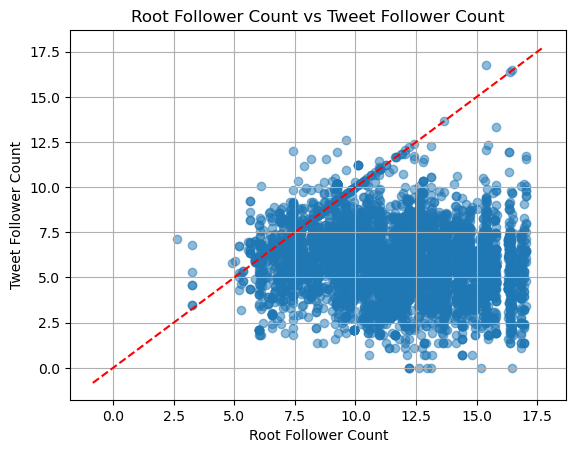

In [14]:
import matplotlib.pyplot as plt
plt.scatter(dfAllTweets["RootFollowerCount_log"],dfAllTweets["TweetFollowerCount_log"],alpha=0.5, label="Data Points")

x_min,x_max=plt.xlim()
y_min,y_max=plt.ylim()
xy_min=min(x_min,y_min)
xy_max=max(x_max,y_max)
plt.plot([xy_min,xy_max],[xy_min,xy_max],color="red",linestyle="--",label="Root Follower=Tweet Follower")

plt.xlabel("Root Follower Count")
plt.ylabel("Tweet Follower Count")
plt.title("Root Follower Count vs Tweet Follower Count")
plt.grid(True)
plt.show()